### Code 

With the following code I tried different input for the neural network and I used the predicted points in files in order to confront the different outputs later. 

In [14]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import numpy as np
import matplotlib.pyplot as plt

import os

from keras import optimizers, losses, metrics

def f(x):
    return 4-3*x-2*x**2+3*x**3

In [15]:
# generate training inputs
np.random.seed(0)
increase = 10
x_train = np.random.uniform(-1, 1, 100*increase) 
x_valid = np.random.uniform(-1, 1, 10*increase)
x_valid.sort()
y_target = f(x_valid) # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) 
y_valid = np.random.normal(f(x_valid), sigma)

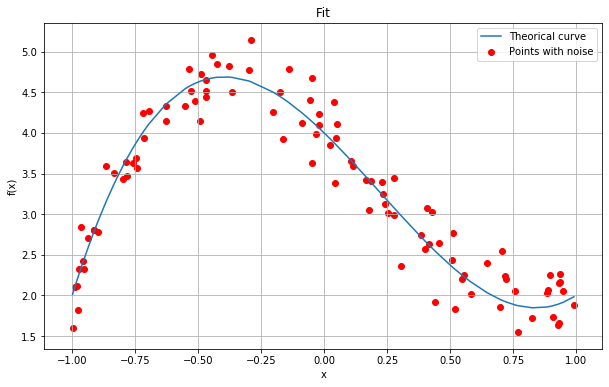

In [16]:
# plot training and target dataset
plt.figure(figsize=(10,6))
plt.plot(x_valid, y_target, label = 'Theorical curve')
plt.scatter(x_valid, y_valid, color='r', label="Points with noise")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fit')
plt.legend()
plt.grid(True); plt.show()

In [17]:
loss_function = ['mse','mae','msle', 'logcosh']
activat = ['elu', 'selu','sigmoid', 'relu', 'softsign', 'tanh']
optimiz = ['adagrad','adadelta','sgd','rmsprop']

n_layers = [3,5,10]
n_neurons = [10,40,90]

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5717 - mse: 5.1667 - val_loss: 0.0902 - val_mse: 1.7995
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0367 - mse: 0.7599 - val_loss: 0.0577 - val_mse: 1.0633
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.4430 - val_loss: 0.0211 - val_mse: 0.3133
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0189 - mse: 0.3587 - val_loss: 0.0153 - val_mse: 0.2282
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0183 - mse: 0.3476 - val_loss: 0.0302 - val_mse: 0.4962
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0148 - mse: 0.2837 - val_loss: 0.0267 - val_mse: 0.4573
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0160 - mse: 0.3047 - val_loss: 0.0173 - val_mse: 0.3111
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0147 - m

20/20 [==============================] - 0s 2ms/step - loss: 0.0076 - mse: 0.1291 - val_loss: 0.0073 - val_mse: 0.1054
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0078 - mse: 0.1337 - val_loss: 0.0117 - val_mse: 0.1852
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0074 - mse: 0.1234 - val_loss: 0.0070 - val_mse: 0.1033
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0084 - mse: 0.1408 - val_loss: 0.0068 - val_mse: 0.0969
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0078 - mse: 0.1319 - val_loss: 0.0077 - val_mse: 0.1213
Epoch 68/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0081 - mse: 0.1373 - val_loss: 0.0072 - val_mse: 0.1116
Epoch 69/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0070 - mse: 0.1155 - val_loss: 0.0087 - val_mse: 0.1431
Epoch 70/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0

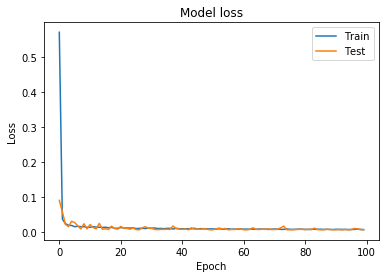

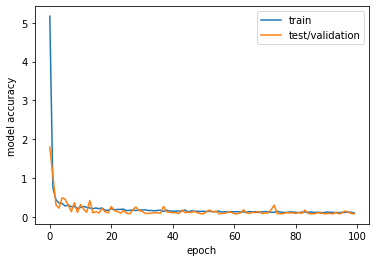

INFO:tensorflow:Assets written to: Saved/bestmodel/assets
Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6290 - mse: 5.6371 - val_loss: 0.1224 - val_mse: 2.3453
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0517 - mse: 1.0295 - val_loss: 0.0513 - val_mse: 0.7852
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0242 - mse: 0.4424 - val_loss: 0.0184 - val_mse: 0.3179
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0219 - mse: 0.3972 - val_loss: 0.0153 - val_mse: 0.2616
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0179 - mse: 0.3311 - val_loss: 0.0160 - val_mse: 0.2263
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0170 - mse: 0.3044 - val_loss: 0.0195 - val_mse: 0.3235
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0180 - mse: 0.3294 - val_loss: 0.0099 - val_mse: 0.1648
Epoch 8/100
20/20 [======

Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0069 - mse: 0.1159 - val_loss: 0.0078 - val_mse: 0.1215
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0082 - mse: 0.1454 - val_loss: 0.0068 - val_mse: 0.0992
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0080 - mse: 0.1348 - val_loss: 0.0064 - val_mse: 0.0953
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0084 - mse: 0.1428 - val_loss: 0.0069 - val_mse: 0.0950
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.1248 - val_loss: 0.0061 - val_mse: 0.0872
Epoch 68/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 0.1492 - val_loss: 0.0071 - val_mse: 0.1007
Epoch 69/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0069 - mse: 0.1171 - val_loss: 0.0077 - val_mse: 0.1214
Epoch 70/100
20/20 [==============================] - 0s 2ms/step - loss: 0.

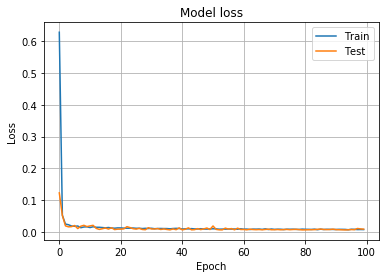

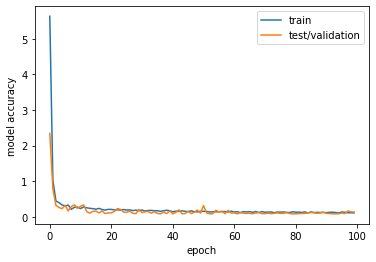

INFO:tensorflow:Assets written to: Saved/bestmodel/assets
Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 8/100

Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 68/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7008 - val_loss: 2.0572 - val_mse: 11.6625
Epoch 69/100
20/20 [==============================] - 0s 2ms/s

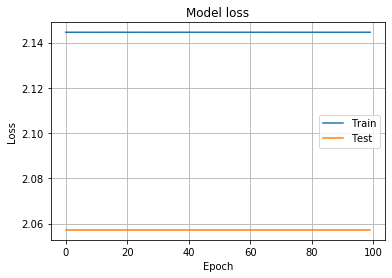

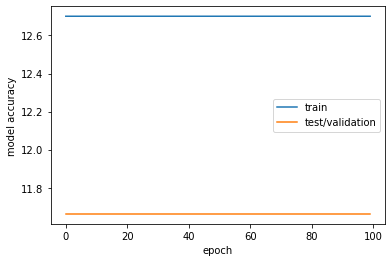

INFO:tensorflow:Assets written to: Saved/bestmodel/assets
Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 8/100

Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 68/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5179 - val_loss: 2.0572 - val_mse: 11.4751
Epoch 69/100
20/20 [==============================] - 0s 2ms/s

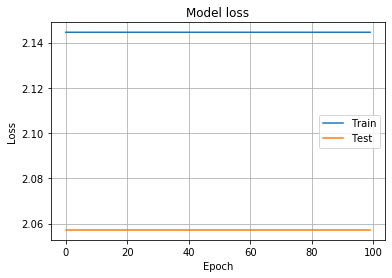

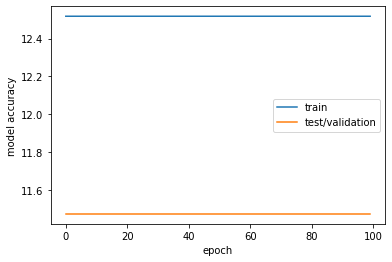

INFO:tensorflow:Assets written to: Saved/bestmodel/assets
Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5119 - mse: 4.8001 - val_loss: 0.1024 - val_mse: 2.2769
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0419 - mse: 0.8635 - val_loss: 0.0315 - val_mse: 0.5467
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0225 - mse: 0.4145 - val_loss: 0.0149 - val_mse: 0.2279
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0212 - mse: 0.4008 - val_loss: 0.0144 - val_mse: 0.2077
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0160 - mse: 0.2714 - val_loss: 0.0096 - val_mse: 0.1379
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0175 - mse: 0.3218 - val_loss: 0.0204 - val_mse: 0.3719
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.2542 - val_loss: 0.0130 - val_mse: 0.1930
Epoch 8/100
20/20 [======

Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0079 - mse: 0.1334 - val_loss: 0.0083 - val_mse: 0.1266
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0076 - mse: 0.1282 - val_loss: 0.0060 - val_mse: 0.0860
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.1203 - val_loss: 0.0128 - val_mse: 0.2291
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0084 - mse: 0.1436 - val_loss: 0.0093 - val_mse: 0.1387
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0072 - mse: 0.1207 - val_loss: 0.0142 - val_mse: 0.2251
Epoch 68/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0080 - mse: 0.1346 - val_loss: 0.0126 - val_mse: 0.2018
Epoch 69/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0076 - mse: 0.1312 - val_loss: 0.0073 - val_mse: 0.1107
Epoch 70/100
20/20 [==============================] - 0s 2ms/step - loss: 0.

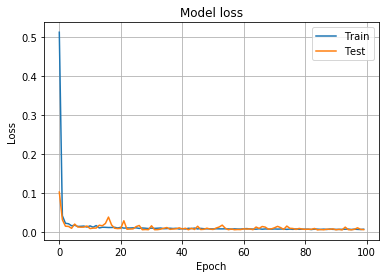

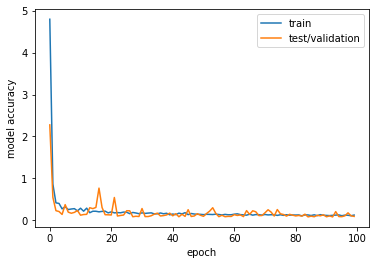

INFO:tensorflow:Assets written to: Saved/bestmodel/assets
Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 8/100

Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7048 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 68/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.7047 - val_loss: 2.0572 - val_mse: 11.6660
Epoch 69/100
20/20 [==============================] - 0s 2ms/s

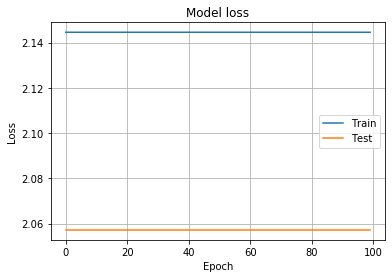

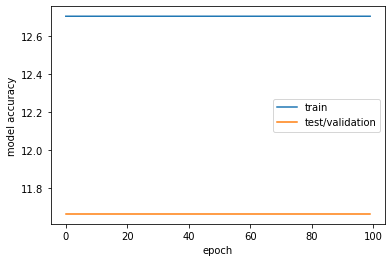

INFO:tensorflow:Assets written to: Saved/bestmodel/assets
Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5374 - mse: 5.1312 - val_loss: 0.1238 - val_mse: 2.3926
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0512 - mse: 1.0611 - val_loss: 0.0331 - val_mse: 0.5943
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0244 - mse: 0.4720 - val_loss: 0.0419 - val_mse: 0.7766
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0208 - mse: 0.3881 - val_loss: 0.0281 - val_mse: 0.4718
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0166 - mse: 0.3206 - val_loss: 0.0131 - val_mse: 0.1947
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0159 - mse: 0.2900 - val_loss: 0.0202 - val_mse: 0.2606
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0175 - mse: 0.3341 - val_loss: 0.0158 - val_mse: 0.2411
Epoch 8/100
20/20 [======

Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0078 - mse: 0.1318 - val_loss: 0.0109 - val_mse: 0.1505
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0087 - mse: 0.1502 - val_loss: 0.0158 - val_mse: 0.2587
Epoch 65/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0076 - mse: 0.1287 - val_loss: 0.0064 - val_mse: 0.0907
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0081 - mse: 0.1379 - val_loss: 0.0114 - val_mse: 0.1965
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0078 - mse: 0.1333 - val_loss: 0.0059 - val_mse: 0.0852
Epoch 68/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0079 - mse: 0.1350 - val_loss: 0.0086 - val_mse: 0.1405
Epoch 69/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.1225 - val_loss: 0.0063 - val_mse: 0.0964
Epoch 70/100
20/20 [==============================] - 0s 2ms/step - loss: 0.

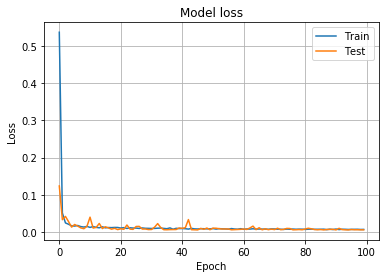

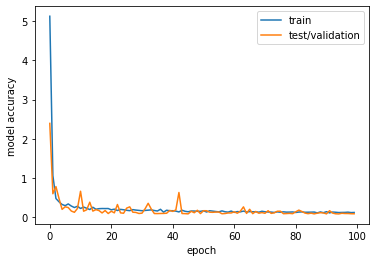

INFO:tensorflow:Assets written to: Saved/bestmodel/assets
Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 2.1445 - mse: 12.5939 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5939 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5940 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5939 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5940 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5939 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5939 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 8/100

Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5939 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5939 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5939 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5939 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5939 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5939 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 68/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1445 - mse: 12.5939 - val_loss: 2.0572 - val_mse: 11.5527
Epoch 69/100
20/20 [==============================] - 0s 2ms/s

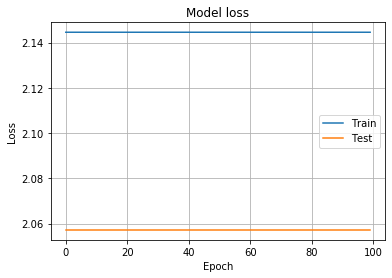

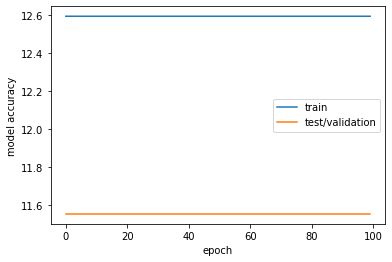

INFO:tensorflow:Assets written to: Saved/bestmodel/assets
Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5947 - mse: 5.3897 - val_loss: 0.1202 - val_mse: 2.5342
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.9863 - val_loss: 0.0348 - val_mse: 0.6226
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0230 - mse: 0.4500 - val_loss: 0.0354 - val_mse: 0.6336
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.3533 - val_loss: 0.0165 - val_mse: 0.2461
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0154 - mse: 0.2833 - val_loss: 0.0155 - val_mse: 0.2966
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0139 - mse: 0.2458 - val_loss: 0.0370 - val_mse: 0.7141
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0163 - mse: 0.3066 - val_loss: 0.0463 - val_mse: 0.9292
Epoch 8/100
20/20 [======

Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0082 - mse: 0.1411 - val_loss: 0.0063 - val_mse: 0.0959
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0078 - mse: 0.1326 - val_loss: 0.0142 - val_mse: 0.2331
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0070 - mse: 0.1182 - val_loss: 0.0073 - val_mse: 0.1056
Epoch 66/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0088 - mse: 0.1506 - val_loss: 0.0063 - val_mse: 0.0953
Epoch 67/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.1229 - val_loss: 0.0090 - val_mse: 0.1317
Epoch 68/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0079 - mse: 0.1321 - val_loss: 0.0058 - val_mse: 0.0818
Epoch 69/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0075 - mse: 0.1262 - val_loss: 0.0056 - val_mse: 0.0807
Epoch 70/100
20/20 [==============================] - 0s 2ms/step - loss: 0.

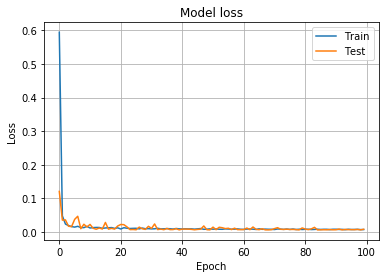

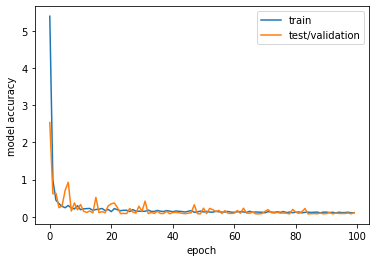

INFO:tensorflow:Assets written to: Saved/bestmodel/assets


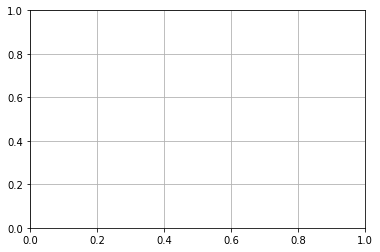

In [18]:
lossf = loss_function[2]
act = activat[3]
opt = optimiz[3]

for l in range(3):
    layers = n_layers[1]
    for n in range(3):
        neurons = n_neurons[2]

        model = tf.keras.Sequential()
        model.add(Dense(units=neurons, input_shape=(1,)))

        for i in range(layers):
            model.add(Dense(units=neurons, activation = act))

        model.add(Dense(units=1))#activation = act))

# compile the model choosing optimizer, loss and metrics objects
        model.compile(optimizer=opt, loss=lossf, metrics=['mse']) 
#mae sembra essere la migliore con Dtrain = 10000 e sigma = 0 e activation = relu e Nepoch = 50

        history = model.fit(x=x_train, y=y_train, 
                  batch_size=50, epochs=100,
                  shuffle=True,
                  validation_data=(x_valid, y_valid))

        score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

        print()
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        model_epochs = np.column_stack((history.history['loss'],history.history['val_loss']))
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='best')
        plt.show()
        plt.plot(history.history['mse'])      #plt.plot(history.history['acc']) #for generic 'accuracy'
        plt.plot(history.history['val_mse'])  #plt.plot(history.history['val_acc'])
        plt.ylabel('model accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test/validation'], loc='best')
        plt.show()
        plt.grid(True)
        save_model_path=f'Saved/bestmodel'
        model.save(filepath=save_model_path, include_optimizer=True)    